In [1]:
#Importing Data from the CSV file
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import sys

os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q2")
print("Path has been changed to:\n", os.getcwd())

#Importing Data X from the CSV file
temp = np.genfromtxt('q2test.csv', delimiter=',')
#print(temp[1:])

X1_test = temp[1:, 0].reshape(-1,1)
X2_test = temp[1:, 1].reshape(-1,1)
Y_test = temp[1:, 2].reshape(-1,1)
X0_test = np.ones((X1_test.shape))
X_test = np.append(X0_test, X1_test, axis=1)
X_test = np.append(X_test, X2_test, axis=1)

num_test = X_test.shape[0]
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques2")
print("Path changed back to python file directory:\n", os.getcwd())

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q2
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques2


In [2]:
#given as input
m = 1000000
x0 = np.ones((m,1)) #Intercept term

#Sample X1 ~ N(3,4) and sample X2 ~ N(-1, 4)
x1 = np.random.normal(3, 2, m).reshape(-1,1)
x2 = np.random.normal(-1, 2, m).reshape(-1,1)

#Make a 1Mx3 matrix
X = np.append(x0,x1,axis=1)
X = np.append(X, x2, axis=1)
print("The number of training samples to be generated is {}".format(m))

The number of training samples to be generated is 1000000


In [3]:
#Sample epsilon error in the data from N(0, 2)
epsilon = np.random.normal(0, np.sqrt(2), m).reshape(-1,1)

#Theta is fixed with values 3, 1, 2 for generating the data. 
#We will later use these parameters to verify our hypothesis from SGD. 
theta = np.array([[3], [1], [2]])

In [4]:
#Generate the value of Y (given X, parameterized by given Theta)
Y = np.dot(X,theta) + epsilon

In [5]:
#Data is (X, Y)
#Randomly shuffle the data
temp = np.append(X, Y, axis=1)
#We use random shuffle from numpy to shuffle all the rows of the data
np.random.shuffle(temp)
X = temp[:,0:3]
Y = temp[:,-1:]

In [54]:
#Applying SGD on X, Y to learn hypothesis with parameters theta

#Model Initial Parameters initialized to zeros
theta = np.zeros((3,1))
#Learning Rate (has to be fixed)
alpha = 0.001 

#Batch Size r options stored in an array 
batch_size = np.array([1, 100, 10000, 1000000])

print("The model's initial theta is = {} and the learning rate is = {}".format(theta.T, alpha))

The model's initial theta is = [[0. 0. 0.]] and the learning rate is = 0.001


In [55]:
#define the hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

#Define the cost function over the entire sample/batch
def cost_total(X, theta, Y, m):
    h_x= hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((Y-h_x)**2) # Average Cost Function
    return cost

#function for calculating the cost function gradient
def cost_grad(X, theta, Y, m):
    temp = np.dot(X, theta)-Y
    theta_grad = np.zeros((3,1))
    theta_grad += np.dot(X.transpose(), temp)
    return theta_grad/m #average Gradient 
    
cost_start = cost_total(X, theta, Y, m)
print("Initial Cost value for the hypothesis with zero parameters={}".format(cost_start))

Initial Cost value for the hypothesis with zero parameters=19.02304717410501


In [56]:
#r is the current batch size (choose between 1, 100, 10000, 1000000 - defined in batch_size array)
r = batch_size[1] 

#number of batches (sub batches stored in an array mini_batch)
mini_batch = [(X[i:i+r,:], Y[i:i+r]) for i in range(0, m, r)]
print("The size of one batch is = {} and the number of batches = {}".format(r, len(mini_batch)))

The size of one batch is = 100 and the number of batches = 10000


In [57]:
import time
start = time.time()

i=0   #Variable for outer loop
J_curr=0.0; #Store the current cost at one (r=1) data point/over r data points
theta_all = theta

J_avg = np.array([cost_total(X[0], theta, Y[0], 1)])
print(J_avg)

#We change the while condition to while(1) for r=1 since only one epoch is enough.
while(True):
    i+=1
    count = 0
    cost_initial = cost_total(X, theta, Y, m) # Cost at the starting of the epoch
    for b in mini_batch:
        X_b = b[0]
        Y_b = b[1]
        J_curr += cost_total(X_b, theta, Y_b, r)
        #Change this value for different batch sizes. 
        # When r = 1, then we check convergence at every 10000 samples. 
        # When r = 100, #batches= 10000, then we chech the average cost of every 100 samples. 
        # When r = 10000, #batches = 100, then we check the average cost after every 10 samples. 
        # When r = 1000000, #batches = 1, count is always 1 so this doesnt matter. 
        if(count%100 == 0 and count!=0):
            J_curr /= 100; #gives the average cost over 1000 iterations. 
            J_avg = np.append(J_avg, J_curr)
            print("Current average cost = {}".format(J_curr)) 
            J_curr=0.0;  
        theta -= alpha * cost_grad(X_b, theta, Y_b, r)
        theta_all = np.append(theta_all,theta,axis=1)
        count +=1
    cost_final = cost_total(X, theta, Y, m)
    print("Cost is = {} in iterations = {}".format(cost_final, i)) 
    if (abs(cost_final - cost_initial) < 0.00000001):
        print(cost_final, cost_initial, cost_final-cost_initial)
        break
end = time.time()

print("Cost is = {} in iterations = {} in time = {} sec".format(cost_final, i, end-start))

[39.47549641]
Current average cost = 11.198583357320793
Current average cost = 5.100784078746458
Current average cost = 3.3883416871814798
Current average cost = 2.501118099109486
Current average cost = 2.120811264511469
Current average cost = 1.9134390876035783
Current average cost = 1.8342023681868238
Current average cost = 1.7858509648881844
Current average cost = 1.6890405766127068
Current average cost = 1.6152868243866538
Current average cost = 1.6428472591533976
Current average cost = 1.5904929278615407
Current average cost = 1.5756211382248169
Current average cost = 1.5159648347484203
Current average cost = 1.4946106665995484
Current average cost = 1.4970400801184667
Current average cost = 1.4681638219175743
Current average cost = 1.4549749928360296
Current average cost = 1.3870409404334219
Current average cost = 1.3694481806490417
Current average cost = 1.3635219622248587
Current average cost = 1.3693392035321637
Current average cost = 1.306341118931411
Current average cost = 1

Current average cost = 0.991229986635175
Current average cost = 1.0095274220869457
Current average cost = 1.0081201681872367
Current average cost = 1.0137359177160692
Current average cost = 1.0064545092093093
Current average cost = 0.9854722952261896
Current average cost = 1.001097181046345
Current average cost = 1.010009109839926
Current average cost = 0.9791514778075754
Current average cost = 0.9924665680909964
Current average cost = 1.013569703116327
Current average cost = 0.9976153359710874
Current average cost = 0.9778866707699082
Current average cost = 1.0092542507923015
Current average cost = 0.9878286362396932
Current average cost = 1.011434777967623
Current average cost = 0.9895255044043896
Current average cost = 1.009917796140611
Current average cost = 0.9917064901596803
Current average cost = 0.9984191262047942
Current average cost = 0.9827288990875478
Current average cost = 1.01794482687341
Current average cost = 0.9980224708827117
Current average cost = 0.9991169248437854


Current average cost = 1.0135316602872095
Current average cost = 0.9976444904526207
Current average cost = 0.977884228007036
Current average cost = 1.0091817529206122
Current average cost = 0.9878593919727995
Current average cost = 1.0114125683832527
Current average cost = 0.9895287514272559
Current average cost = 1.0099390264539188
Current average cost = 0.9917382431190905
Current average cost = 0.9983937712116875
Current average cost = 0.9827073336165051
Current average cost = 1.0179551035465237
Current average cost = 0.9980253528920607
Current average cost = 0.9991142807478635
Current average cost = 0.984383616763613
Current average cost = 0.9765141135150281
Current average cost = 1.0155406631039794
Current average cost = 0.9804867795889382
Current average cost = 1.0041146771760823
Current average cost = 0.9791733687507025
Current average cost = 1.0072268548903556
Current average cost = 1.0142868963715603
Current average cost = 0.9893587685998111
Current average cost = 1.00334853760

In [58]:
print("Final theta learned = \n", theta)

Final theta learned = 
 [[3.00297147]
 [0.99637633]
 [1.9962794 ]]


In [59]:
test_err_original = cost_total(X_test, np.array([[3],[1],[2]]), Y_test, num_test)
print("The Test error on Original Hypothesis with theta = 0 is = {}".format(test_err_original))

test_err_learned = cost_total(X_test, theta, Y_test, num_test)
print("The Test error on Learned Hypothesis = {}".format(test_err_learned))

print("The difference in the test error of original and learned hypothesis is = {}".format(test_err_learned-test_err_original))

The Test error on Original Hypothesis with theta = 0 is = 0.9829469215
The Test error on Learned Hypothesis = 0.9850172360676815
The difference in the test error of original and learned hypothesis is = 0.002070314567681586


In [60]:
#For r =1
#theta_all_new = theta_all.T[0:40000:5,:]
#For r = 100
theta_all_new = theta_all.T[0::15,:]
#For r = 10000
#theta_all_new = theta_all.T[0::15,:]
#For r = 1000000
#theta_all_new = theta_all.T[0::30,:]
print(theta_all_new.shape)

(3334, 3)


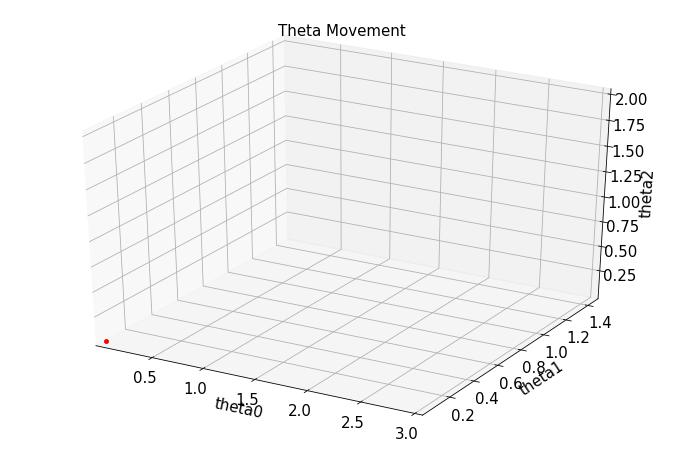

In [61]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Theta Movement", fontsize=15)
ax.set_xlabel('theta0', fontsize=15)
ax.set_ylabel('theta1', fontsize=15)
ax.set_zlabel('theta2', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

graph = ax.scatter([], [], [], marker='o', c='r', s=15)
ax.set_xlim(np.amin(theta_all_new[:,0]), np.amax(theta_all_new[:,0]))
ax.set_ylim(np.amin(theta_all_new[:,1]), np.amax(theta_all_new[:,1]))
ax.set_zlim(np.amin(theta_all_new[:,2]), np.amax(theta_all_new[:,2]))
graph.set_alpha(1)
xdata, ydata, zdata = [], [], []

def animate(i):
    xdata.append(theta_all_new[i,0])
    ydata.append(theta_all_new[i,1])
    zdata.append(theta_all_new[i,2])
    graph._offsets3d = (xdata, ydata, zdata)
    return graph

#for r =1
#anim = FuncAnimation(fig, animate, frames=np.arange(0, theta_all_new.shape[0], 1000), interval=200, repeat_delay=3000, blit=False)

#for r =100
anim = FuncAnimation(fig, animate, frames=np.arange(0, theta_all_new.shape[0], 20), interval=200, repeat_delay=3000, blit=False)

#for r =10000
#anim = FuncAnimation(fig, animate, frames=np.arange(0, theta_all_new.shape[0], 10), interval=200, repeat_delay=3000, blit=False)

#for r =1000000
#anim = FuncAnimation(fig, animate, frames=np.arange(0, theta_all_new.shape[0], 10), interval=200, repeat_delay=3000, blit=False)

plt.show()
#anim.save('plot_r_100.gif', writer='imagemagick')